# Getting started with arrays and plots in Python

**Prerequisite:**
- [About Python](https://jgreene100.github.io/Ast207/docs/intro_python/about_py.html)
- [Setting up your Python Environment](https://jgreene100.github.io/Ast207/docs/intro_python/getting_started.html)

**We will learn:**
- Manipulate catalog data using `astropy.table.Table`
- Understand data types and structures
- Learn `print` and `f-string` formatting
- Working with `numpy` arrays
- Plotting basic figures using `matplotlib`

---

In [1]:
# Let's start with importing our packages
import os
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
from astropy.table import Table

# We can beautify our plots by changing the matpltlib setting a little
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2

In [2]:
# Let's load in the data
import os
from google.colab import drive
from astropy.table import Table

drive.mount('/content/drive/')
os.chdir('/content/drive/Shareddrives/AST207/data')

Mounted at /content/drive/


# Import packages

Note how we import the packages. There are mainly 3 ways to import packages:
- directly import something, such as `import matplotlib`. In this way, you can call the functions under this package like `matplotlib.colorbar` directly.
- import something as something, such as `import numpy as np`. Now `np` is an alias of the package `numpy`. It is a super convenient feature and will save your life. However, there are **conventions** of some popular packages. E.g., `import numpy as np`, `import pandas as pd`, etc.
- import a subpackage from a package, such as `import matplotlib.pyplot as plt`. By doing this, we import a subpackage `pyplot` from `matplotlib`, and set up an alias `plt`. Another example is `from astropy.table import Table`, where `Table` is a Python class in `astropy.table`. Some other examples are `import astropy.units as u`, `import astropy.constants as const`.

In this notebook, we are going to learn (for the first time!) how to work with data in Python. As astronomers, a huge amount of what we do involves taking observations in the form of catalogs and comparing them visually. Today, we're going to take a step back from space and think about **football**, and play around with some data for the 2023 NFL rosters.

### 1. Read a catalog of the football players

We have a catalog of the 2023 NFL rosters. The catalog is in the form of a CSV file, which is a common format for storing data. You can also open this CSV file using Microsoft Excel or MacOS Numbers. In Python, we can read this file using the `astropy.table.Table` class. We have imported this class as `Table` from the `astropy.table` package. Now we use `Table.read()` to read the CSV file.

In [3]:
cat = Table.read('./players_age.csv')
cat

nflId,height,weight,birthDate,collegeName,officialPosition,displayName,height_inches,age
int64,str4,int64,str10,str30,str3,str26,float64,int64
25511,6-4,225,1977-08-03,Michigan,QB,Tom Brady,76.0,47
28963,6-5,240,1982-03-02,"Miami, O.",QB,Ben Roethlisberger,77.0,42
29550,6-4,328,1982-01-22,Arkansas,T,Jason Peters,76.0,42
29851,6-2,225,1983-12-02,California,QB,Aaron Rodgers,74.0,41
30078,6-2,228,1982-11-24,Harvard,QB,Ryan Fitzpatrick,74.0,42
30842,6-6,267,1984-05-19,UCLA,TE,Marcedes Lewis,78.0,40
30869,6-7,330,1981-12-12,Louisiana State,T,Andrew Whitworth,79.0,43
33084,6-4,217,1985-05-17,Boston College,QB,Matt Ryan,76.0,39
33107,6-4,315,1985-08-30,Virginia Tech,T,Duane Brown,76.0,39


This table includes many columns, including the players ID, height, weight, birthdate, etc. If you want to check all the column names, you can use `cat.colnames`.

In [4]:
cat.colnames

['nflId',
 'height',
 'weight',
 'birthDate',
 'collegeName',
 'officialPosition',
 'displayName',
 'height_inches',
 'age']

Let's define two variables, namely `height` and `weight`:

In [5]:
height = cat['height_inches']
weight = cat['weight']

We note that different data have different **data types**. For example, the player's name is a `string`, the player's height is a `float` number, and the player's weight is an `int`eger. Data with different types might not be able to operate together. For example, you cannot add a string to a number! Some other data types include `bool`ean, `complex`, etc.

Let's check the data types of height and weight:

In [6]:
print("Height datatype:", height.dtype)
print("Weight datatype:", weight.dtype)

Height datatype: float64
Weight datatype: int64


Here we used the `print` function. The `print` function is used to print the specified message to the screen, or other standard output device. The message can be a string, or any other object, the object will be converted into a string before written to the screen. The arguments seperated by commas are concatenated with a space. Another very cool way of using `print` is to use the `f-string` format. You can use `f` before the string and use `{}` to include the variables. E.g., the above code can be written as `print(f"Height is {cat['height'].dtype}, weight is {cat['weight'].dtype}")`. This is a very convenient way to print out the variables in a string.

Let's check the type of the height and weight columns in the catalog. They are actually `astropy.table.column.Column` objects.

In [7]:
print(f'Height column type = {type(height)}')
print(f'Weight column type = {type(weight)}')

Height column type = <class 'astropy.table.column.Column'>
Weight column type = <class 'astropy.table.column.Column'>


Often it's more convenient to work with the data as a *numpy array*. We can convert the column to a **numpy array** using `np.array(cat['height'])`:

In [8]:
height = np.array(height)
weight = np.array(weight)
print(f'height = {type(height)}')
print(f'weight = {type(weight)}')

height = <class 'numpy.ndarray'>
weight = <class 'numpy.ndarray'>


Another common way to store data is a `list`. A list is a collection which is ordered and changeable. In Python lists are written with square brackets. You can convert a `numpy` array to a list using `list()`. e.g.:

In [9]:
height_list = list(height)
print(type(height_list))
height_list[:5]

<class 'list'>


[76.0, 77.0, 76.0, 74.0, 74.0]

**Exercise 1:**

- Open a new cell below

- Can you find out the length of the height and weight arrays?

*Tips: you can use the `len()` function to find out the length of an array.*

#### Indexing and slicing

Indexing refers to selecting an element from an array. Slicing refers to selecting a range of elements from an array. In Python, the index starts from 0. For example, the first element of an array is indexed as 0, the second element is indexed as 1, and so on.

If we wanna select the first element of an array, we can use `array[0]`. If we wanna select the forth element of an array, we can use `array[3]`. For the last element of an array, we can use `array[-1]`. The second last element of an array can be selected as `array[-2]`.

If we wanna select the first 3 elements of an array, we can use `array[0:3]`. The first number is the starting index, and the second number is the ending index. The ending index is not included in the selection. If we wanna select the first 3 elements of an array, we can also use `array[:3]`. If we wanna select the last 3 elements of an array, we can use `array[-3:]`. If we wanna select every other element of an array, we can use `array[::2]`.

**Exercise 2:**

Open a new cell below. Then try to select the first 5 elements of the height array, and the last 5 elements of the weight array.

### 2. Who's the tallest and heaviest player?

To gain more insight into the data, let's try to find out who's the tallest and heaviest player in the dataset. `Numpy` provides a lot of useful functions to work with arrays. For example, `np.max()` can find the maximum value of an array; `np.argmax()` (argument of the max) can find the index of the maximum value in an array.

In [10]:
np.max(height), np.argmax(height)

(81.0, 191)

This means the tallest player is 81 inches tall, and the index of that player is 191 in the catalog. Let's see who that player is by indexing the catalog using the index:

In [11]:
print(cat[np.argmax(height)])

nflId height weight birthDate  collegeName officialPosition     displayName      height_inches age
----- ------ ------ ---------- ----------- ---------------- -------------------- ------------- ---
41222    6-9    320 1988-09-22        Army                T Alejandro Villanueva          81.0  36


**Exercise 3:**

Find the player with the maximum weight. Is it the same as the player with the maximum height?

In [12]:
## Your answer goes here in this cell

## 3. Sort the players by height

We can sort the players by height using `np.argsort()`. This function returns the indices of the players from the shortest to the tallest. We can then use these indices to sort the catalog.

In [13]:
np.argsort(height) # Returns the indices of players sorted by height (low to high)

array([1154,  888, 1420, ...,  803,  148,  191])

In [14]:
height[np.argsort(height)] # indexing the original height array with the sorted indices would give us the sorted height array

array([66., 66., 66., ..., 80., 80., 81.])

This can also be achieved using the np.sort() function:

In [15]:
height_sorted = np.sort(height)

If you wanna get the sorted array but in the inverse order, you can use `[::-1]` to reverse the array.


In [16]:
height_sorted = np.sort(height)[::-1]
print(height_sorted)

[81. 80. 80. ... 66. 66. 66.]


**Exercise 4:**

Print out the weights for the players sorted by their height.

In [17]:
## Your answer goes here

## 4. Comparison and logical operations

We can use comparison operators to compare two values. The result of the comparison is a **boolean** value, either `True` or `False`. The comparison operators include `==` (equal), `!=` (not equal), `>` (greater than), `<` (less than), `>=` (greater than or equal to), `<=` (less than or equal to). For example, `1 == 1` is `True`, `1 != 1` is `False`, `1 > 1` is `False`, `-10 < 1` is `True`, `3 >= 1` is `True`, `1 <= 1` is `True`.

Sometimes we wanna combine multiple conditions. We can use logical operators to do that. The logical operators include `and`, `or`, `not`. For example, we can use the following:

```python
price = 30
if price > 20 and price < 40:
    print("The price is between 20 and 40")
else:
    print("The price is not between 20 and 40")
```
The above code tries to check if the price is between 20 and 40. `price > 20 and price < 40` is a composite condition, and it is `True` if the price is between 20 and 40. However, in Python, you can't write `20 < price < 40`. You have to write `20 < price and price < 40`.

We also see `if` and `else` in the code. `if` is a conditional statement that executes some specified code after checking if the condition is `True`. `else` is a conditional statement that executes some specified code if the condition is `False`.

**Exercise 5:**

Find the number of players who have a height greater than 75 inches and a weight greater than 200 pounds.

*Tip: you might wanna use `np.sum()`. The sum function treats True as 1 and False as 0.*

In [18]:
## Your answer goes here

If we wanna find out how many players are taller than 75 inches and heavier than 300 pounds, we wanna **combine** the two conditions. We can use the `&` operator to combine the two conditions.
The `&` operator is used to perform a element-wise `AND` operation. For example, `[True, False] & [True, True]` will give `[True, False]`. Similarly, the `|` operator is used to perform a element-wise `OR` operation. For example, `[True, False] | [True, True]` will give `[True, True]`.

In [19]:
np.sum((height > 75) & (weight > 300))

210

**Tips**

See also: `np.all` and `np.any` functions.

## 5. Plotting the height and weight of the players

The `matplotlib` package is a very powerful package for plotting figures. We have imported the `pyplot` subpackage from `matplotlib` as `plt`. We can use `plt.plot()` to plot a line plot, `plt.scatter()` to plot a scatter plot, `plt.hist()` to plot a histogram, etc. Let's first try to plot the height and weight of the players as a scatter plot.

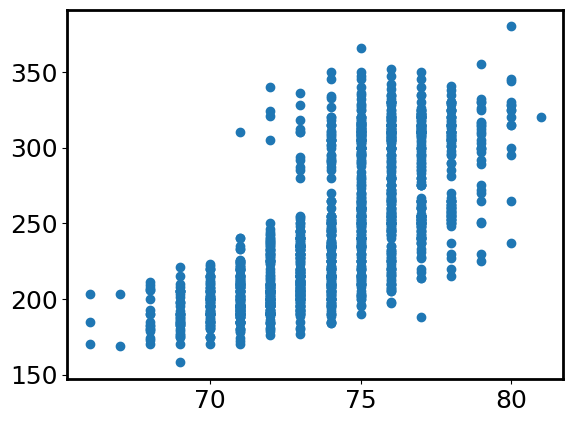

In [20]:
# Your very first python plot
plt.scatter(height, weight)

Yeah! We have our first plot. But it is not very informative. Let's add some labels and titles to make it more informative.

Text(0.5, 1.0, 'Football Players')

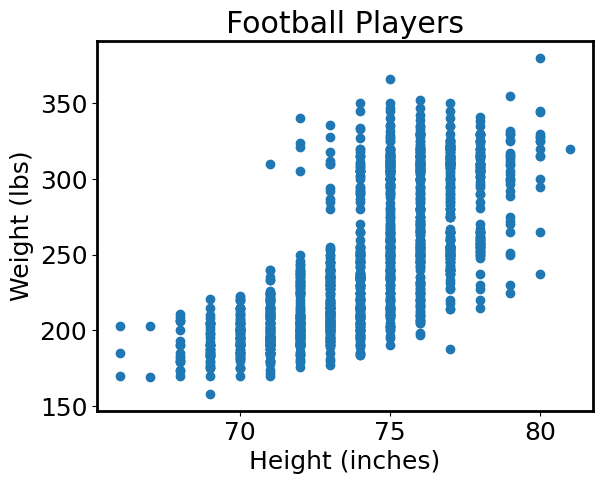

In [21]:
plt.scatter(height, weight)
plt.xlabel('Height (inches)')
plt.ylabel('Weight (lbs)')
plt.title('Football Players')

Much better! Please remember to add labels to your plots!! It is very important to make your plots informative.

You can customize the scatter plot in many ways. Please read the documentation of [`plt.scatter()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) to learn more about the customization options. We list some common options here:
- `s`: the size of the markers. e.g., `plt.scatter(x, y, s=100)` will make the markers quite large.
- `c`: the color of the markers. e.g., `plt.scatter(x, y, c='red')` will make the markers red. The color can also be an array, e.g., `plt.scatter(x, y, c=age)` will color the markers by the age of the players. You can also use a colormap, e.g., `plt.scatter(x, y, c=age, cmap='viridis')` will color the markers by the age of the players using the `viridis` colormap. You can find a list of colormaps [here](https://matplotlib.org/stable/tutorials/colors/colormaps.html).
- `marker`: the shape of the markers. e.g., `plt.scatter(x, y, marker='x')` will make the markers crosses. Other commonly used markers include `o` (circle), `s` (square), `^` (triangle), etc. See [`matplotlib.markers`](https://matplotlib.org/stable/api/markers_api.html) for a full list of markers.
- `alpha`: the transparency of the markers. e.g., `plt.scatter(x, y, alpha=0.5)` will make the markers semi-transparent. The value of `alpha` ranges from 0 to 1, where 0 is fully transparent and 1 is fully opaque.
- `label`: the label of the markers. e.g., `plt.scatter(x, y, label='data')` will add a label to the markers. You can use `plt.legend()` to show the labels.

Let's try a more sophisticated scatter plot. We will plot the height and weight of the players, and color the markers by the player's age. We will also add a colorbar to show the age-color mapping.

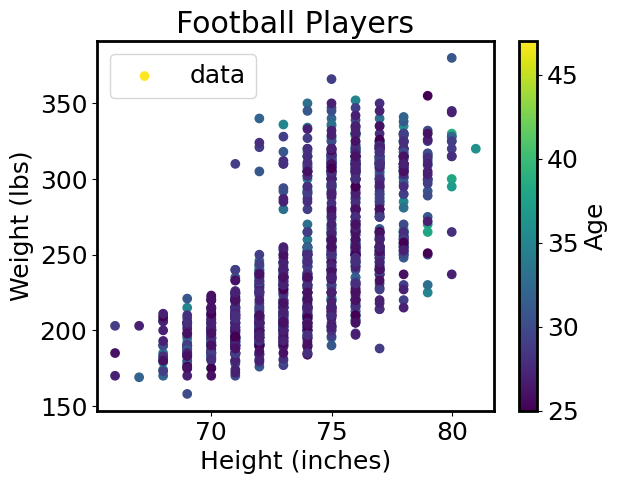

In [22]:
height = np.array(cat['height_inches'])
weight = np.array(cat['weight'])
age = np.array(cat['age'])
plt.scatter(height, weight, c=age, label='data', cmap='viridis')
plt.xlabel('Height (inches)')
plt.ylabel('Weight (lbs)')
plt.title('Football Players')
plt.colorbar(label='Age')
plt.legend()
plt.show()

Another way to plot the above figure is to work with the `matplotlib` object-oriented interface. This is a more flexible way to plot figures. You can create a figure and an axis object using `plt.subplots()`, and then use the axis object to plot the figure. You can also add labels, titles, legends, etc. to the axis object. It will be powerful when you have multiple subplots.

We create a new figure and axis using:
```python
fig, ax = plt.subplots()
```
Then we plot the figure using:
```python
ax.scatter()
```
It seems a bit confusing at first, but it is actually quite simple. The `plt.subplots()` function creates a figure and an axis object. The `fig` object is the figure, and the `ax` object is the axis. You can use the `ax` object to plot the figure. For example, you can use `ax.scatter()` to plot a scatter plot, `ax.plot()` to plot a line plot, etc. You can also add labels, titles, legends, etc. to the `ax` object. A more complete example is shown below.

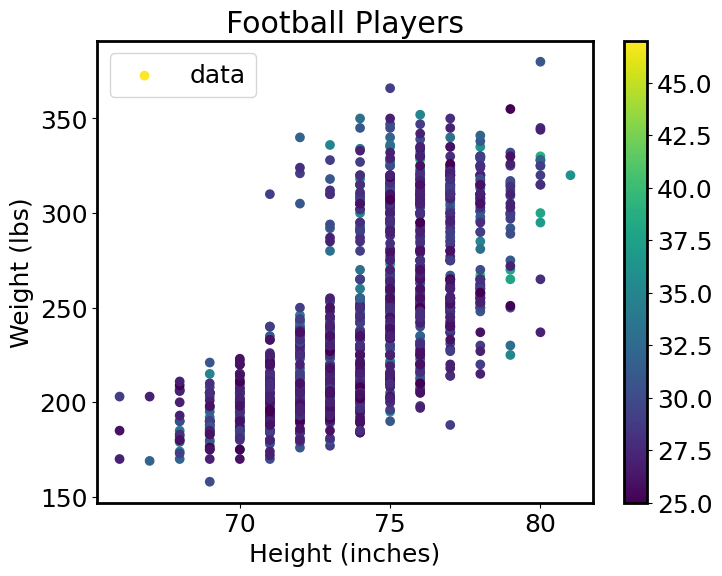

In [23]:
fig, ax = plt.subplots(figsize=(8, 6)) # here I set the figure size to be 8x6 inches

height = np.array(cat['height_inches'])
weight = np.array(cat['weight'])
age = np.array(cat['age'])

sct = ax.scatter(height, weight, c=age, label='data', cmap='viridis')
ax.set_xlabel('Height (inches)')
ax.set_ylabel('Weight (lbs)')
ax.set_title('Football Players')
ax.legend()

# show colorbar
cbar = plt.colorbar(sct)

To practice your plotting skills, let's try to plot two figures in one plot:
- left: a scatter plot of height vs. weight, color-coded by the player's age
- right: a scatter plot of weight vs. age, color-coded by the player's height

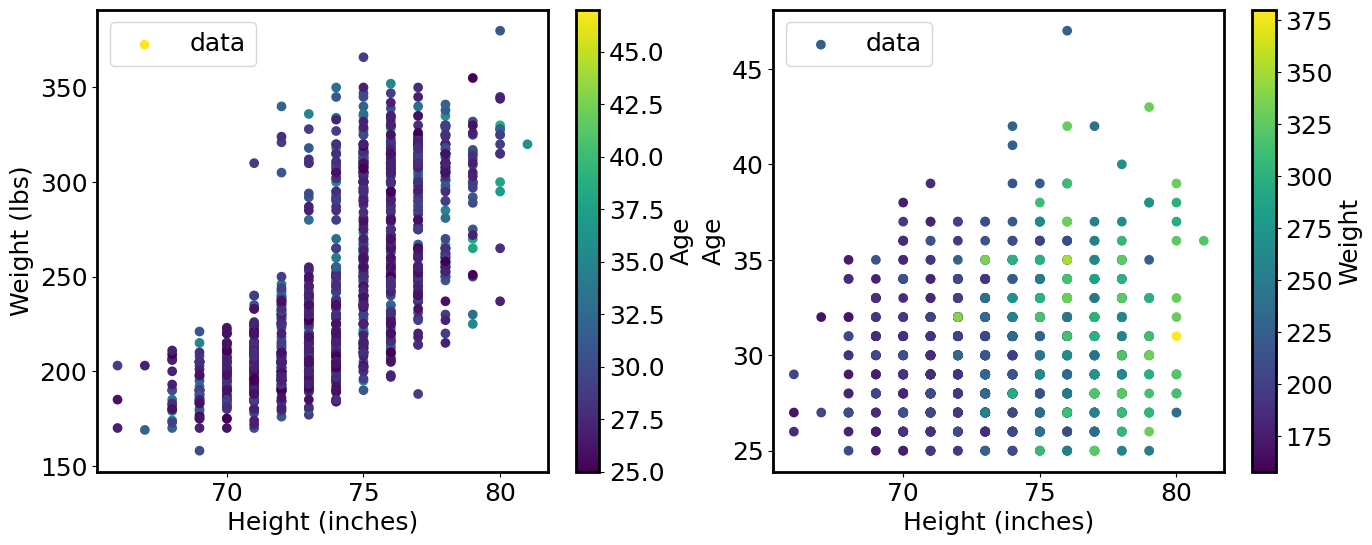

In [24]:
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(16, 6))

# left: height vs weight
sct1 = ax1.scatter(height, weight, c=age, label='data', cmap='viridis')
ax1.set_xlabel('Height (inches)')
ax1.set_ylabel('Weight (lbs)')
ax1.legend()
cbar1 = plt.colorbar(sct1, ax=ax1)
cbar1.set_label('Age')

# right: height vs age
sct2 = ax2.scatter(height, age, c=weight, label='data', cmap='viridis')
ax2.set_xlabel('Height (inches)')
ax2.set_ylabel('Age')
ax2.legend()
cbar2 = plt.colorbar(sct2, ax=ax2)
cbar2.set_label('Weight')

**Tips:**

You can adjust the subplots separation by using `plt.subplots_adjust()`. e.g., `plt.subplots_adjust(wspace=0.5)` will adjust the width space between the two subplots to be 0.5.


**Exercise 6:**

Plot a scatter plot of weight vs. age. Set the marker type to "squares", and the marker color to orange.

**Exercise 7:**

Let's calculate the BMI of these football players. BMI is defined as `BMI = weight / height**2`, where weight is in kg and height is in meters. The weight and height in the above data are in lbs and inches. Please convert the units, and then calculate the BMI.

**Exercise 8:**

Plot a scatter plot of the calculated BMI vs. age. Do you see any trend?


In [25]:
## Your answer here

In [26]:
# Your answer here

## Summary

- We have learned how to read a catalog using `astropy.table.Table`.
- We have learned how to convert a column to a `numpy` array.
- We have learned how to sort an array using `np.argsort()`.
- We have learned how to compare and combine conditions using comparison and logical operators.
- We have learned how to plot figures using `matplotlib.pyplot`.